## Experiment 3

Implement Multiple Linear Regression on a suitable dataset

Equation : y = β0 ​+ β1​x1​ + β2​x2​ + … + βn​xn​ + ε

- y : dependent variable (continuous)
- x1,x2,...,xn : independent variables 
- βi : coefficients (learned by minimizing error)
- ε : error term

The goal of MLR is to find the best-fitting hyperplane through multidimensional data points that minimizes the prediction error. It tries to minimize the sum of square errors.

#Assumptions : 
-   Linearity: 	Relationship between dependent and independent variables is linear.

-	Independence: 	Residuals (errors) are independent of each other.

-	Homoscedasticity:	Variance of residuals is constant across all levels of predictors.

-	Normality: 	Residuals are normally distributed.

-	No Multicollinearity:	Independent variables are not highly correlated with each other.

-	No Autocorrelation:	Especially important for time-series data (residuals shouldn’t be correlated over time).

#Advantages 
- easy to use
- works well on linearly seperable dataset


#Disadvantages 
- poor on non linear data
- sensitive to outliers and multicolinearity

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/advertising.csv')

- Dataset is about how advertising budgets across different media (TV, Radio, Newspaper) affect product Sales.

- It is a classic dataset for Mulitple Linear Regression task.

In [3]:
print(df.shape)
df.head()

(200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
import seaborn as sns

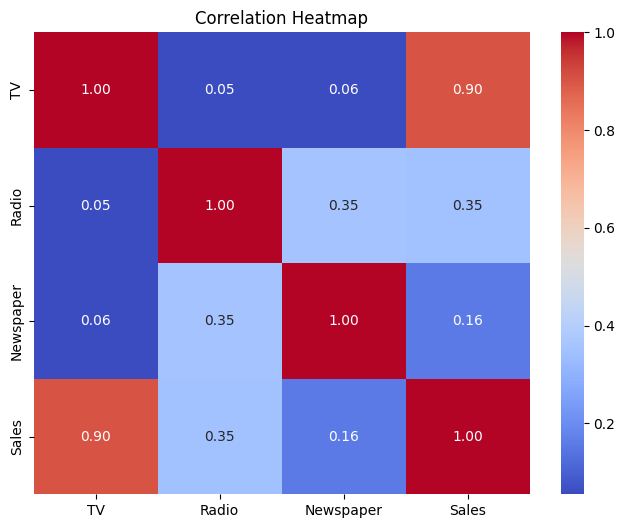

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [6]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [7]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# model training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# prediction
y_pred = model.predict(X_test_scaled)

In [11]:
# evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [12]:
print("🔹 Intercept:", model.intercept_)
print("🔹 Coefficients:", model.coef_)
print("🔹 Mean Squared Error (MSE):", mse)
print("🔹 Root Mean Squared Error (RMSE):", rmse)
print("🔹 R-squared:", r2, "\n")

🔹 Intercept: 4.753583885846798
🔹 Coefficients: [16.11839139  5.00688997  0.43626667]
🔹 Mean Squared Error (MSE): 2.907756910271089
🔹 Root Mean Squared Error (RMSE): 1.7052146229349223
🔹 R-squared: 0.9059011844150826 



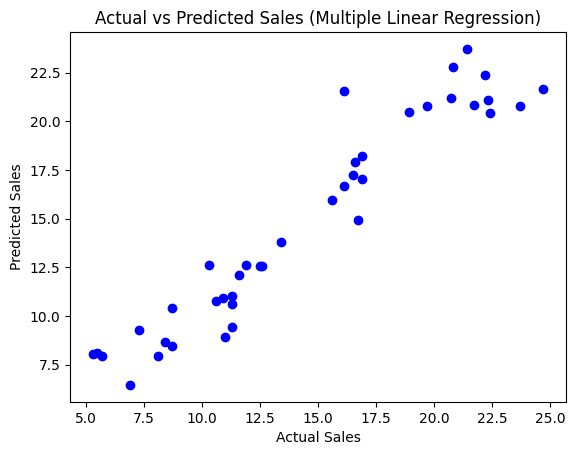

In [13]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Multiple Linear Regression)")
plt.show()
